# Load dataset

In [ ]:
import numpy as np
import pandas as pd
import math
import pylab
%matplotlib inline


In [ ]:
import matplotlib                  
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
from scipy.stats import norm
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn import preprocessing
from pathlib import Path


In [ ]:
df = pd.read_excel("nycairbnb_2022.xlsx")
df.shape

(37410, 17)

In [ ]:
df.head()

,id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,bathrooms_text,bedrooms,beds,amenities,price,availability_365,number_of_reviews,review_scores_rating,instant_bookable
0,2595,f,t,Midtown,Manhattan,40.75356,-73.98559,Entire home/apt,1 bath,NaN,1.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and b...",225,308,48,4.70,f
1,5121,f,t,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room,NaN,1.0,1.0,"[""Heating"", ""Long term stays allowed"", ""Kitche...",60,365,50,4.52,f
2,5136,f,t,Sunset Park,Brooklyn,40.66265,-73.99454,Entire home/apt,1.5 baths,2.0,2.0,"[""Dryer"", ""Heating"", ""Hair dryer"", ""Carbon mon...",275,250,2,5.00,f
3,5178,f,f,Midtown,Manhattan,40.76457,-73.98317,Private room,1 bath,1.0,1.0,"[""Conditioner"", ""Essentials"", ""Extra pillows a...",68,172,536,4.23,f
4,5203,f,t,Upper West Side,Manhattan,40.80380,-73.96751,Private room,1 shared bath,1.0,1.0,"[""Carbon monoxide alarm"", ""Heating"", ""Essentia...",75,0,118,4.91,f


In [ ]:
df['bathroom_qty'] = df["bathrooms_text"].str.split(" ", expand=True)[0]
df["bathroom_type"] = df["bathrooms_text"].str.split(" ", expand=True)[1]

In [ ]:
df = df.drop(columns=['bathrooms_text', 'neighbourhood_cleansed', 'amenities' ])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            37410 non-null  int64  
 1   host_is_superhost             37344 non-null  object 
 2   host_identity_verified        37344 non-null  object 
 3   neighbourhood_group_cleansed  37410 non-null  object 
 4   latitude                      37410 non-null  float64
 5   longitude                     37410 non-null  float64
 6   room_type                     37410 non-null  object 
 7   bedrooms                      33756 non-null  float64
 8   beds                          36509 non-null  float64
 9   price                         37410 non-null  int64  
 10  availability_365              37410 non-null  int64  
 11  number_of_reviews             37410 non-null  int64  
 12  review_scores_rating          29461 non-null  float64
 13  i

In [ ]:
df['bathroom_qty'] = pd.to_numeric(df['bathroom_qty'],errors = 'coerce')

In [ ]:
df.describe()

,id,latitude,longitude,bedrooms,beds,price,availability_365,number_of_reviews,review_scores_rating,bathroom_qty
count,3.741000e+04,37410.000000,37410.000000,33756.000000,36509.000000,37410.000000,37410.000000,37410.000000,29461.000000,37265.000000
mean,6.100385e+16,40.729308,-73.946171,1.354219,1.634720,190.775221,119.704892,26.347875,4.615201,1.158621
std,1.806040e+17,0.058041,0.056701,0.734038,1.148007,342.491748,132.758373,55.060905,0.759865,0.455790
min,2.595000e+03,40.504560,-74.269520,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.470053e+07,40.688260,-73.983518,1.000000,1.000000,75.000000,0.000000,1.000000,4.590000,1.000000
50%,3.484341e+07,40.724885,-73.953794,1.000000,1.000000,125.000000,60.000000,5.000000,4.830000,1.000000
75%,5.018400e+07,40.763380,-73.926340,1.000000,2.000000,203.000000,254.000000,25.000000,5.000000,1.000000
max,6.412414e+17,40.928340,-73.693210,15.000000,42.000000,12900.000000,365.000000,1419.000000,5.000000,15.500000


#distribution



In [ ]:
col = new_df.select_dtypes(['float', 'int', 'int64']).columns
corr = new_df[col].corr()

In [ ]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

Text(0.5, 1.0, 'Correlation matrix of numerical features')

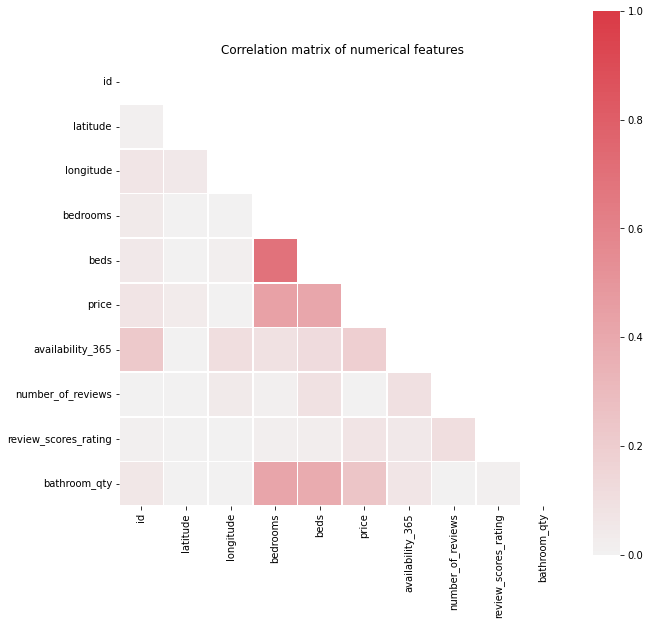

In [ ]:
figure = plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmin=0, vmax=1.0, square=True, linewidths=.5, cbar_kws={"shrink": 1.0})
plt.title('Correlation matrix of numerical features')

In [ ]:
variable_dic = {'nominal_var':['room_type', 'bathroom_type', 'neighbourhood_group_cleansed'],
                'binary_var':['host_is_superhost', 'host_identity_verified', 'instant_bookable'],
                'numerical_var':['id', 'latitude', 'longitude', 'bedrooms', 'beds', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'bathroom_qty']}

In [ ]:
binary_var = []
numerical_var = []
for i in new_df.drop(columns = ['id','price','longitude','latitude']).columns:
    a = len(new_df[i].unique())
    if a > 2 and i in variable_dic['numerical_var']:
        numerical_var.append(i)
    else:
        binary_var.append(i)
print(len(binary_var), len(numerical_var))

6 6


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

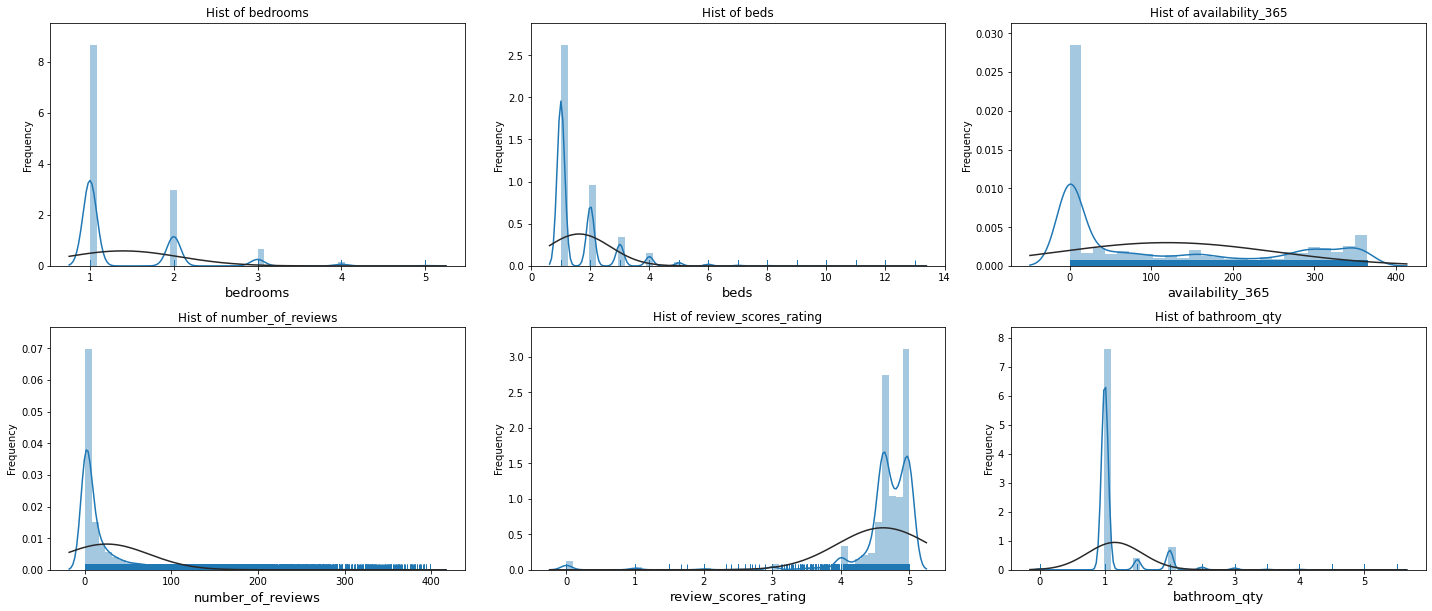

In [ ]:
fig = plt.figure(figsize=(20, 25))
for i in numerical_var:
    plt.subplot(6,3,numerical_var.index(i)+1) 
    sns.distplot(new_df[i], rug=True, fit=norm)
    plt.xlabel(i, fontsize=13)
    plt.ylabel('Frequency')
    plt.title(f'Hist of {i}')
    plt.tight_layout()

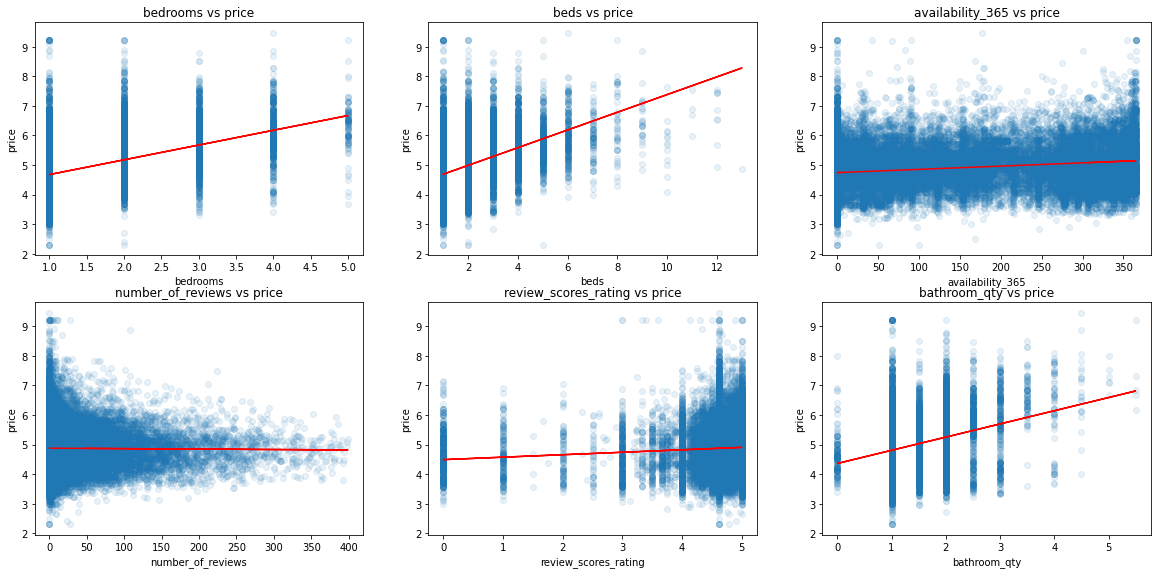

In [ ]:
fig = plt.figure(figsize=(20, 30))
for i in numerical_var:
    fig.add_subplot(6,3,numerical_var.index(i)+1)
    x = new_df[i].to_numpy().reshape(-1, 1)
    y = new_df['price']
    plt.scatter(x, y
               , alpha = 0.1)
    reg = linear_model.LinearRegression()
    reg.fit(x, y)
    y_pre = reg.predict(x)
    plt.plot(x, y_pre , c = 'r')
    plt.title(f'{i} vs price')
    plt.xlabel(i)
    plt.ylabel('price')

In [ ]:
new_df.groupby("host_is_superhost")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
host_is_superhost,,,,,,,,
f,30372.0,4.850267,0.781423,2.302585,4.304065,4.787492,5.298317,9.464983
t,6787.0,4.975674,0.680610,2.639057,4.477337,4.969813,5.416100,9.200290


In [ ]:
new_df.groupby("host_identity_verified")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
host_identity_verified,,,,,,,,
f,6000.0,4.787604,0.743685,2.302585,4.248495,4.744932,5.187386,9.210340
t,31159.0,4.889649,0.768584,2.302585,4.330733,4.844187,5.347108,9.464983


In [ ]:
new_df.groupby("instant_bookable")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
instant_bookable,,,,,,,,
f,27255.0,4.823313,0.741364,2.302585,4.317488,4.787492,5.293305,9.464983
t,9904.0,5.010380,0.812801,2.302585,4.382027,4.934474,5.521461,9.210340


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


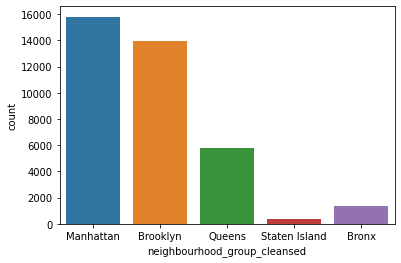

In [ ]:
sns.countplot(df["neighbourhood_group_cleansed"])
plt.show()

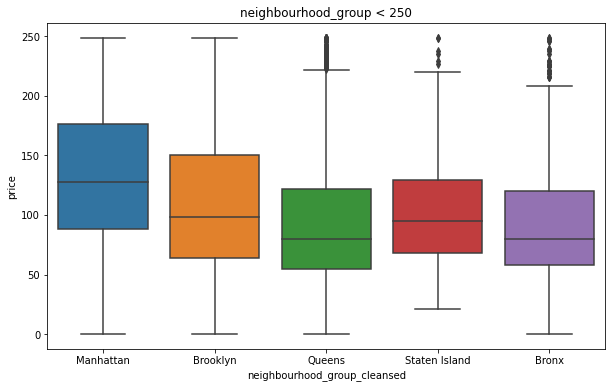

In [ ]:
df1 = df[df.price < 250]   
plt.figure(figsize=(10,6))
 
sns.boxplot(x = 'neighbourhood_group_cleansed',
            y = 'price',
            data=df1
           )
 
plt.title("neighbourhood_group < 250")
 
plt.show()

In [ ]:
room_lis = list(new_df.room_type.unique())

In [ ]:
%pip install geopandas
import folium
from folium.plugins import FastMarkerCluster as fmc
import geopandas as gpd
from branca.colormap import LinearColormap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_map= folium.Map(location=(	40.730610,-73.935242))

In [ ]:
clusters = list(zip(df['latitude'].tolist(), df['longitude'].tolist()))
fmc(data=clusters).add_to(df_map)

In [ ]:
df_map

In [ ]:
df['neighbourhood_group_cleansed'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
import matplotlib.font_manager as mfm
from matplotlib import image


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


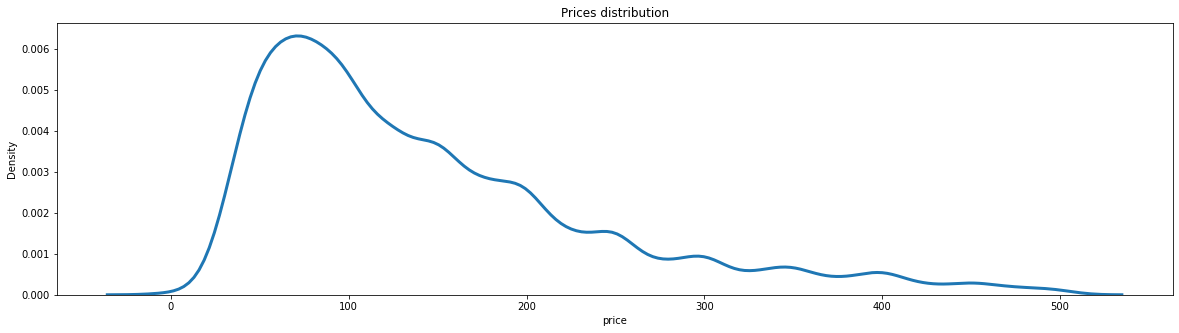

In [ ]:
df_nbh = df[df['price'] < df['price'].quantile(0.95)] #taking the 85% quantile of data

plt.subplots(figsize=(20,5))
g=sns.distplot(df_nbh['price'],hist=False,kde_kws=dict(linewidth=3))
a=g.set_title('Prices distribution')

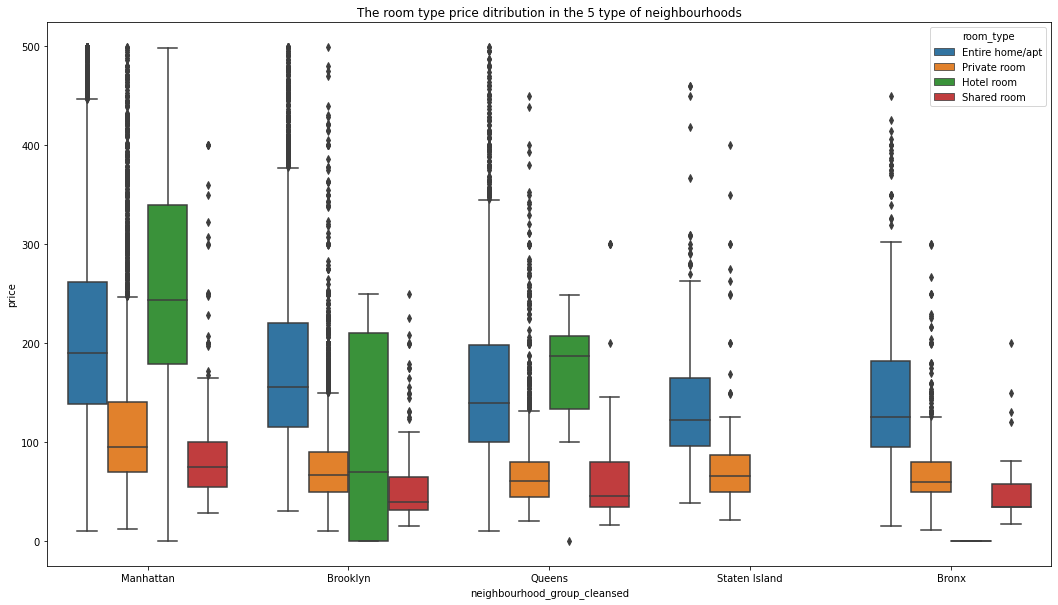

In [ ]:
f=plt.figure(figsize=(18,10))
ax1=f.add_subplot(1,1,1)
ax1=sns.boxplot(x=df_nbh['neighbourhood_group_cleansed'],y=df_nbh['price'],hue=df_nbh['room_type'])
a=ax1.set_title('The room type price ditribution in the 5 type of neighbourhoods')
a=plt.xticks()

In [ ]:
new_df = df_nbh

In [ ]:
new_df = new_df[(new_df['bedrooms'] < 6)&(new_df['beds'] < 15)&(new_df['bathroom_qty'] <5 )&(new_df['number_of_reviews'] < 500)]

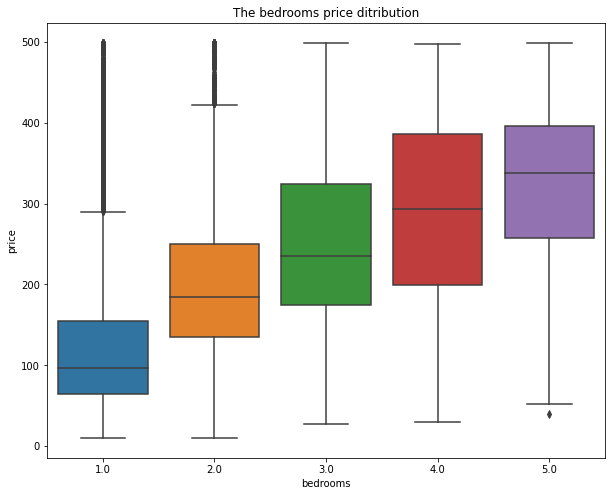

In [ ]:
f=plt.figure(figsize=(10,8))
ax1=sns.boxplot(x=new_df['bedrooms'],y=new_df['price'])
a=ax1.set_title('The bedrooms price ditribution')
a=plt.xticks()

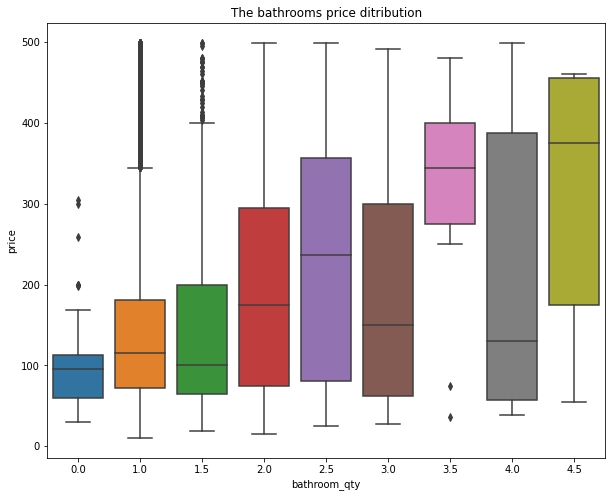

In [ ]:
f=plt.figure(figsize=(10,8))
ax1=sns.boxplot(x=new_df['bathroom_qty'],y=new_df['price'])
a=ax1.set_title('The bathrooms price ditribution')
a=plt.xticks()

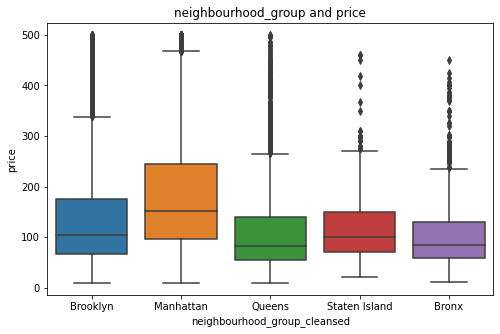

In [ ]:
plt.figure(figsize=(8,5))
 
sns.boxplot(x = 'neighbourhood_group_cleansed',
            y = 'price',
            data=new_df
           )
 
plt.title("neighbourhood_group and price")
 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


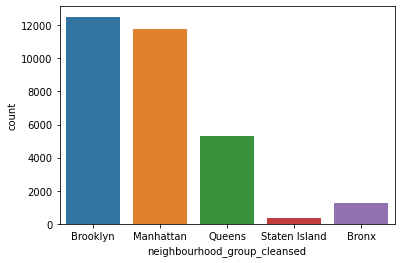

In [ ]:
sns.countplot(new_df["neighbourhood_group_cleansed"])
plt.show()

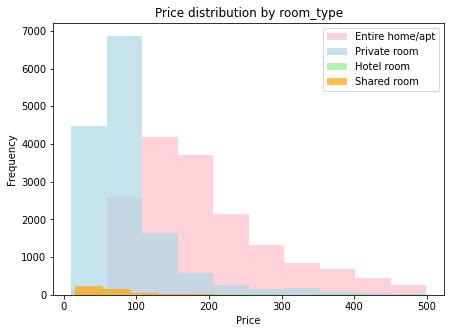

In [ ]:
figure = plt.figure(figsize = (7,5) )
color_list = ['pink', 'lightblue', 'lightgreen','orange']
n = 0
for i in room_lis:
    a = new_df[new_df.room_type == i].price
    plt.hist(a
             , color = color_list[n]
             , alpha = 0.7
             , label = i)
    n += 1
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price distribution by room_type')
plt.show()

In [ ]:
bath_lis = list(new_df.bathroom_type.unique())

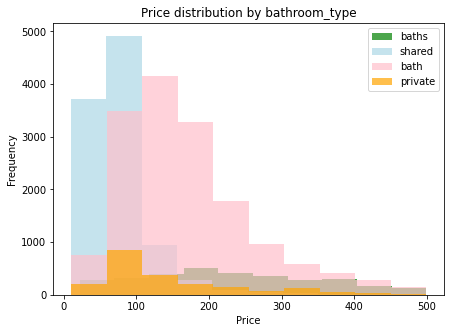

In [ ]:
figure = plt.figure(figsize = (7,5) )
color_list = ['green', 'lightblue', 'pink','orange']
n = 0
for i in bath_lis:
    a = new_df[new_df.bathroom_type == i].price
    plt.hist(a
             , color = color_list[n]
             , alpha = 0.7
             , label = i)
    n += 1
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price distribution by bathroom_type')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


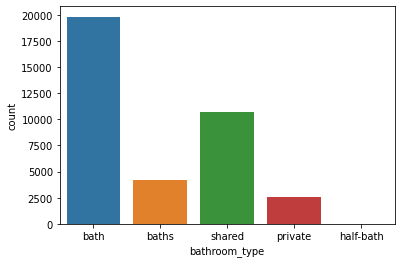

In [ ]:
sns.countplot(df["bathroom_type"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


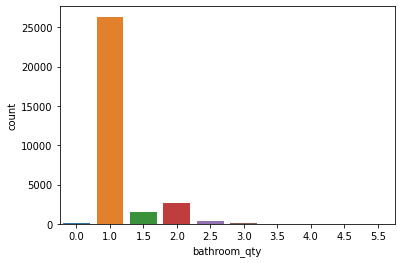

In [ ]:
sns.countplot(new_df["bathroom_qty"])
plt.show()

Text(0.5, 1.0, 'Scatter plot of price by number of reviews')

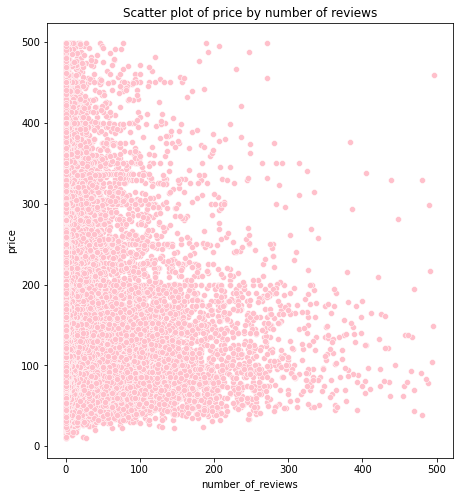

In [ ]:
f=plt.figure(figsize=(16,8))
ax1=f.add_subplot(1,2,1)
sns.scatterplot(y=new_df['price'],x=new_df['number_of_reviews'], color='pink')
ax1.set_title('Scatter plot of price by number of reviews')

In [ ]:
df_rev=new_df.loc[new_df['number_of_reviews']>=1]
df_rev['review_scores_rating']=((df_rev['review_scores_rating']/10)+0.5).astype(int) #format used in the app
df_rev["review_scores_rating"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    24965.000000
mean         0.287162
std          0.452447
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: review_scores_rating, dtype: float64

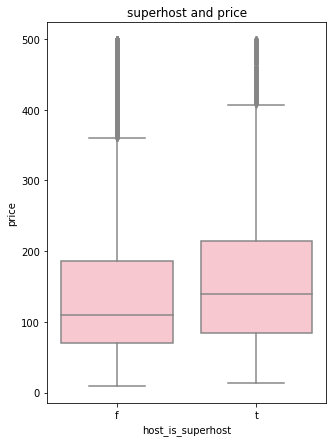

In [ ]:
plt.figure(figsize=(5,7))
 
sns.boxplot(x = 'host_is_superhost',
            y = 'price',
            data=new_df,
            color='pink'
           )
 
plt.title("superhost and price")
 
plt.show()

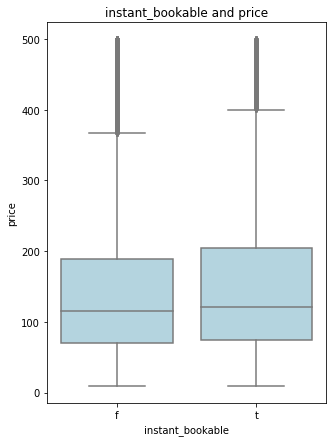

In [ ]:
plt.figure(figsize=(5,7))
 
sns.boxplot(x = 'instant_bookable',
            y = 'price',
            data=new_df,color='lightblue'
           )
 
plt.title("instant_bookable and price")
 
plt.show()

#Imputation for missing data

In [ ]:
df.isnull().sum()

id                                 0
host_is_superhost                 66
host_identity_verified            66
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
room_type                          0
bedrooms                        3654
beds                             901
price                              0
availability_365                   0
number_of_reviews                  0
review_scores_rating            7949
instant_bookable                   0
bathroom_qty                     145
bathroom_type                    119
dtype: int64

In [ ]:
df = df.dropna(how='any', subset=['host_is_superhost','host_identity_verified'])

In [ ]:
#fill with mean
mean_df = df
mean_df['review_scores_rating']=mean_df['review_scores_rating'].fillna(mean_df['review_scores_rating'].mean())
mean_df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


id                                 0
host_is_superhost                  0
host_identity_verified             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
room_type                          0
bedrooms                        3643
beds                             890
price                              0
availability_365                   0
number_of_reviews                  0
review_scores_rating               0
instant_bookable                   0
bathroom_qty                     145
bathroom_type                    119
dtype: int64

In [ ]:
# relationship between room type, bedrooms and beds
df.groupby(by = 'room_type').mean().round()[['bedrooms','beds','bathroom_qty']]

,bedrooms,beds,bathroom_qty
room_type,,,
Entire home/apt,2.0,2.0,1.0
Hotel room,1.0,1.0,1.0
Private room,1.0,1.0,1.0
Shared room,1.0,2.0,1.0


In [ ]:
bedroom_dic = {'Entire home/apt': 2, 'Hotel room': 1, 'Private room': 1, 'Shared room':1}
bed_dic = {'Entire home/apt': 2, 'Hotel room': 2, 'Private room': 1, 'Shared room':2}

In [ ]:
df.bedrooms[df.bedrooms.isnull()] = df[df.bedrooms.isnull()].room_type.apply(lambda x: bedroom_dic[x]) 
df.beds[df.beds.isnull()] = df[df.beds.isnull()].room_type.apply(lambda x: bed_dic[x]) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#fill with mode

new_df['bathroom_qty'].fillna(new_df['bathroom_qty'].mode()[0], inplace=True)
new_df['bathroom_type'].fillna(new_df['bathroom_type'].mode()[0], inplace=True)
new_df.isnull().sum()

id                                 0
host_is_superhost                 31
host_identity_verified            31
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
room_type                          0
bedrooms                           0
beds                               0
price                              0
availability_365                   0
number_of_reviews                  0
review_scores_rating            6211
instant_bookable                   0
bathroom_qty                       0
bathroom_type                      0
dtype: int64

In [ ]:
new_df.shape

(37344, 16)

#Handling skewed target variable

In [ ]:
new_df['price'].skew()

17.449992075580006

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


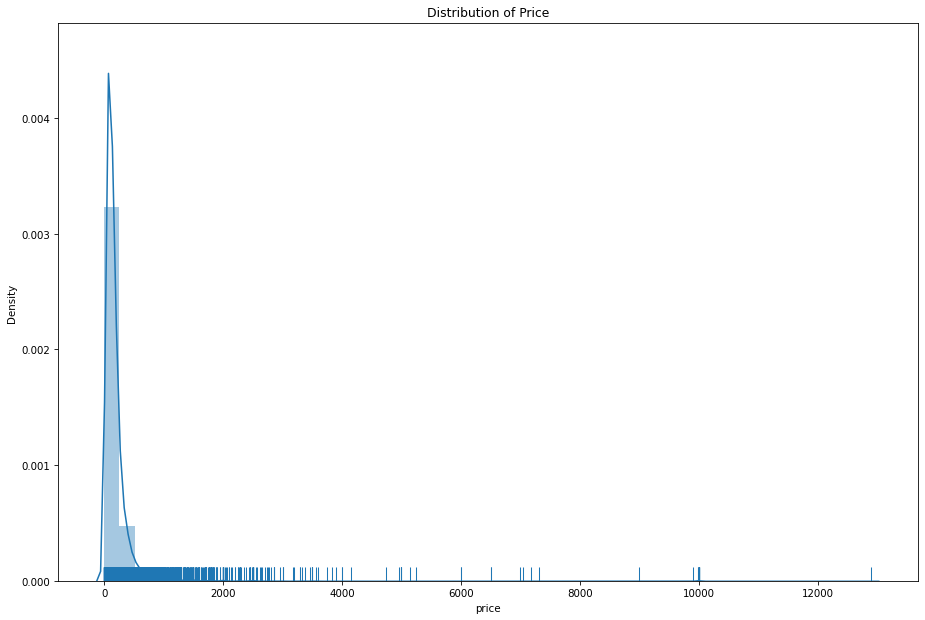

In [ ]:
fig = plt.figure(figsize = (15,10),dpi = 74)
sns.distplot(new_df.price, rug = True)
plt.title('Distribution of Price')
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


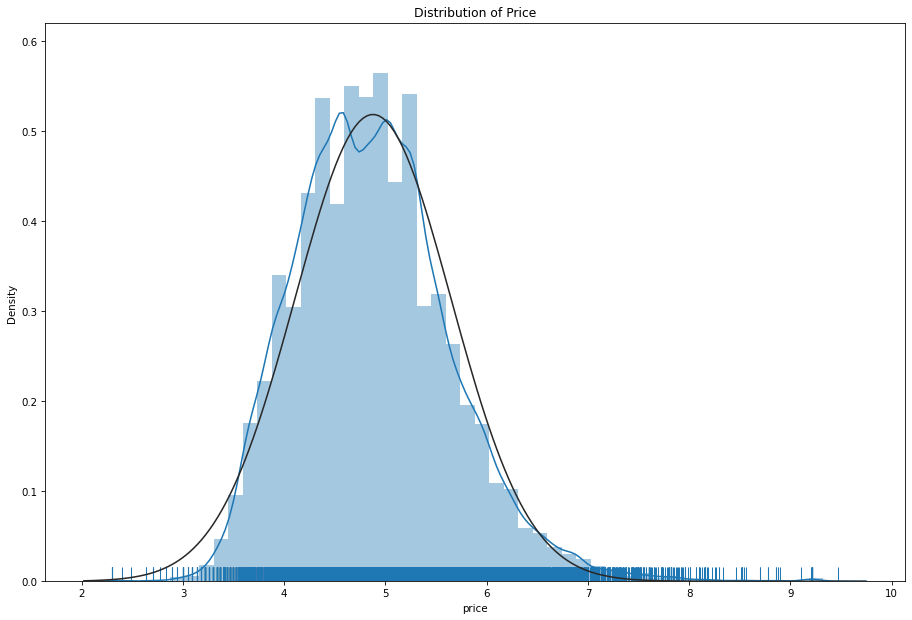

In [ ]:
new_df = new_df[new_df.price!=0]
new_df.loc[:,"price"] = np.log(new_df.price)
fig2 = plt.figure(figsize=(15, 10), dpi=74)
sns.distplot(new_df.price, rug=True, fit=norm)
plt.title('Distribution of Price')
plt.show()

In [ ]:
new_df['price'].skew()

0.6335459166672233

# Outliers

In [ ]:
new_df.shape

(37312, 16)

In [ ]:
new_df = new_df[(new_df['bedrooms'] < 6)&(new_df['beds'] < 15)&(new_df['bathroom_qty'] <6 )&(new_df['number_of_reviews'] < 400)]



In [ ]:
new_df.shape

(37159, 16)

# LOG

In [ ]:
model_df = new_df.drop(columns=['latitude', 'longitude','id' ])

In [ ]:
model_df.columns

Index(['host_is_superhost', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'room_type', 'bedrooms', 'beds',
       'price', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'instant_bookable', 'bathroom_qty',
       'bathroom_type'],
      dtype='object')

In [ ]:
model_df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


bedrooms                1.919757
beds                    2.673700
price                   0.616263
availability_365        0.620978
number_of_reviews       3.323000
review_scores_rating   -5.045446
bathroom_qty            3.104692
dtype: float64

In [ ]:
log_var = model_df.drop(columns=['price','review_scores_rating'])

In [ ]:
for c in [c for c in log_var.columns if np.issubdtype(log_var[c].dtype , np.number)]:
    log_var[c] = np.log1p(log_var[c])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5ef197d10>,
      dtype=object)

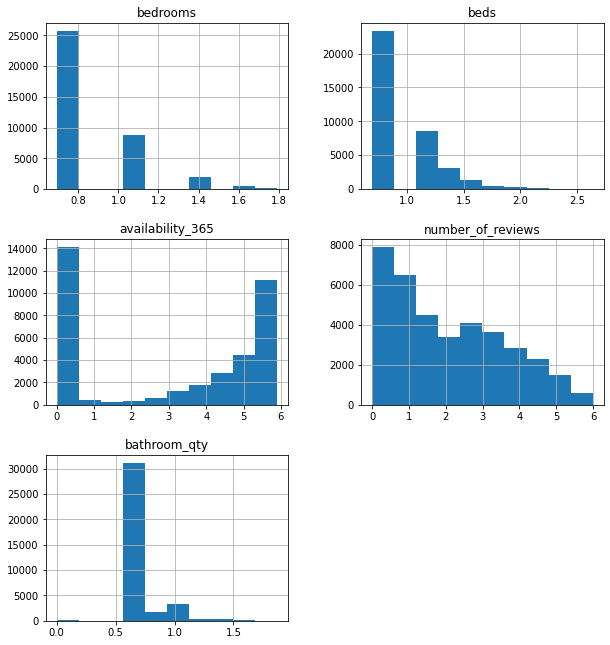

In [ ]:
log_var.hist(figsize=(10,11))

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split
!pip install dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import graphviz
from sklearn.tree import export_graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 2.8 MB/s 
no display found. Using non-interactive Agg backend


In [ ]:
X = pd.get_dummies(log_var)
y = model_df['price']

train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.4, random_state=1)

In [ ]:
Parameters = {'max_depth': np.arange(1,15)
             , 'min_samples_split' : [2,3,4,5,6,7]
             , 'min_samples_leaf' : np.arange(1,15)}
dec_search = RandomizedSearchCV(DecisionTreeRegressor()
                              , Parameters
                              , scoring='neg_mean_squared_error'
                              , cv = 10
                              , random_state = 1
                              , n_jobs = 6
                              , n_iter = 100)
dec_search.fit(train_X, train_y)
dec_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 14, 'min_samples_split': 3}

In [ ]:
Dec_tree = dec_search.best_estimator_

In [ ]:
a = pd.DataFrame(Dec_tree.feature_importances_
                , index = train_X.columns
                , columns=['Importance'])
a = a[a.Importance > 0].sort_values(by = 'Importance')
a

,Importance
neighbourhood_group_cleansed_Bronx,0.000134
room_type_Hotel room,0.000379
room_type_Shared room,0.000428
host_is_superhost_f,0.000597
host_identity_verified_t,0.001500
instant_bookable_f,0.001836
host_identity_verified_f,0.002242
room_type_Private room,0.002395
bathroom_type_baths,0.002437
neighbourhood_group_cleansed_Queens,0.002732


Text(0.5, 1.0, 'Visualizing Importance Features')

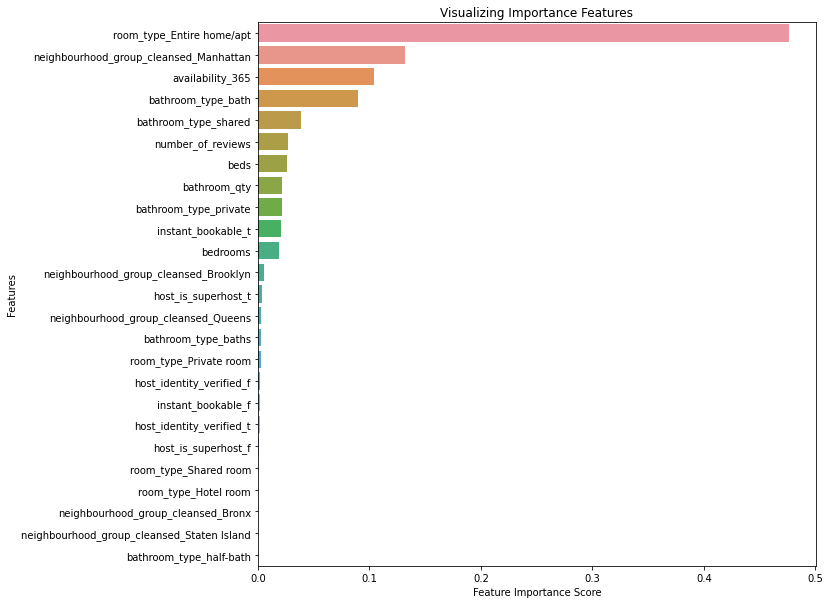

In [ ]:
fig = plt.figure(figsize=(10, 10))
feature_imp=pd.Series(Dec_tree.feature_importances_,index=train_X.columns).sort_values(ascending=False)
sns.barplot(x = feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Importance Features')



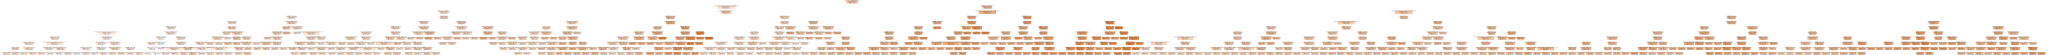

In [ ]:
dot_data = export_graphviz(dec_search.best_estimator_
                           ,out_file = None
                               ,feature_names = train_X.columns
                               ,class_names = ["False","True"]
                               ,filled = True
                               ,rounded = True
                               )
graph = graphviz.Source(dot_data)
graph

In [ ]:
Dec_tree_result = regressionSummary(valid_y, Dec_tree.predict(valid_X) )


Regression statistics

                      Mean Error (ME) : 0.0047
       Root Mean Squared Error (RMSE) : 0.5062
            Mean Absolute Error (MAE) : 0.3686
          Mean Percentage Error (MPE) : -0.8758
Mean Absolute Percentage Error (MAPE) : 7.5716


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
Parameters = {'n_estimators': [500]
             , 'min_samples_split' : [2,3,4,5,6,7]
             , 'min_samples_leaf' : np.arange(2,10)
             , 'max_features': np.arange(1, train_X.shape[1])
             }
RF_search = RandomizedSearchCV( RandomForestRegressor()
                       , Parameters
                       , cv = 5
                       , random_state = 42
                       , n_jobs = -1)
RF_search.fit(train_X, train_y)
RF_search.best_params_

{'max_features': 10,
 'min_samples_leaf': 7,
 'min_samples_split': 6,
 'n_estimators': 500}

In [ ]:
Rand_forest = RF_search.best_estimator_

In [ ]:
a = pd.DataFrame(Rand_forest.feature_importances_
                , index = train_X.columns
                , columns=['Importance'])
a = a[a.Importance > 0].sort_values(by = 'Importance',ascending=False)
a

,Importance
room_type_Entire home/apt,0.211982
room_type_Private room,0.115662
bathroom_type_shared,0.110449
neighbourhood_group_cleansed_Manhattan,0.102685
availability_365,0.097454
bedrooms,0.054451
number_of_reviews,0.050378
beds,0.045972
bathroom_qty,0.043652
bathroom_type_baths,0.037886


Text(0.5, 1.0, 'Visualizing Importance Features')

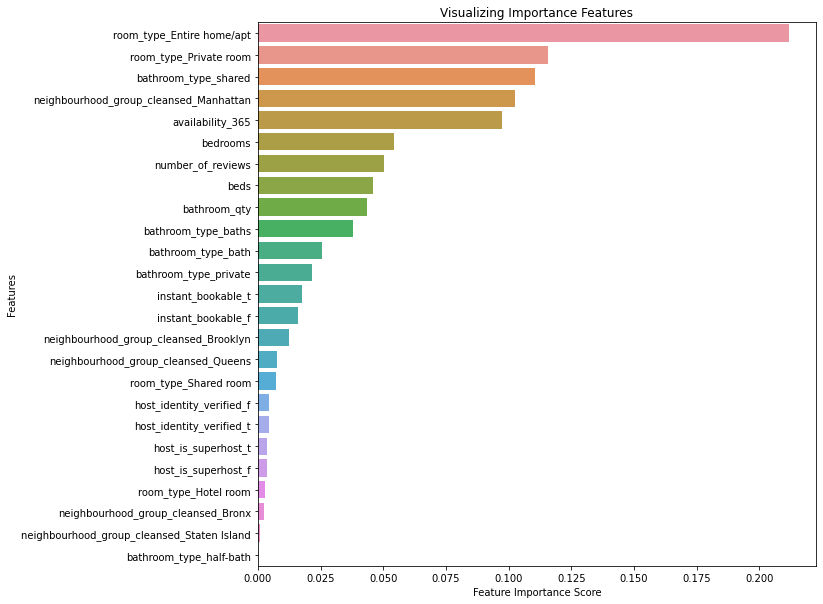

In [ ]:
fig2 = plt.figure(figsize=(10, 10))
feature_imp=pd.Series(Rand_forest.feature_importances_,index=train_X.columns).sort_values(ascending=False)
sns.barplot(x = feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Importance Features')

In [ ]:
Rand_forest_result = regressionSummary(valid_y, Rand_forest.predict(valid_X) )


Regression statistics

                      Mean Error (ME) : 0.0040
       Root Mean Squared Error (RMSE) : 0.4860
            Mean Absolute Error (MAE) : 0.3527
          Mean Percentage Error (MPE) : -0.8759
Mean Absolute Percentage Error (MAPE) : 7.2491


In [ ]:
pred_y = Rand_forest.predict(valid_X)
adjusted_r2_score(train_y, pred_y, Rand_forest)

# GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
Parameters = {'n_estimators': [500]
             , 'learning_rate' : np.arange(0.01,0.105,0.01)
             , 'subsample' : np.arange(0.6,1.01,0.1)
             , 'max_depth': [2,3,4,5,6]}

In [ ]:
GB_search = RandomizedSearchCV(GradientBoostingRegressor()
                       , Parameters
                       , cv = 10
                       , random_state = 20
                       , n_jobs = -1
                       , n_iter = 20)
GB_search.fit(train_X, train_y)
GB_search.best_params_

{'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.7}

In [ ]:
GB = GB_search.best_estimator_

In [ ]:
a = pd.DataFrame(GB.feature_importances_
                , index = train_X.columns
                , columns=['Importance'])
a = a[a.Importance > 0].sort_values(by = 'Importance')
a

,Importance
bathroom_type_half-bath,0.000193
neighbourhood_group_cleansed_Staten Island,0.001706
host_is_superhost_f,0.002743
neighbourhood_group_cleansed_Bronx,0.002807
host_identity_verified_f,0.003043
host_is_superhost_t,0.003052
host_identity_verified_t,0.003314
neighbourhood_group_cleansed_Queens,0.003725
room_type_Shared room,0.004183
room_type_Hotel room,0.005012


Text(0.5, 1.0, 'Visualizing Importance Features')

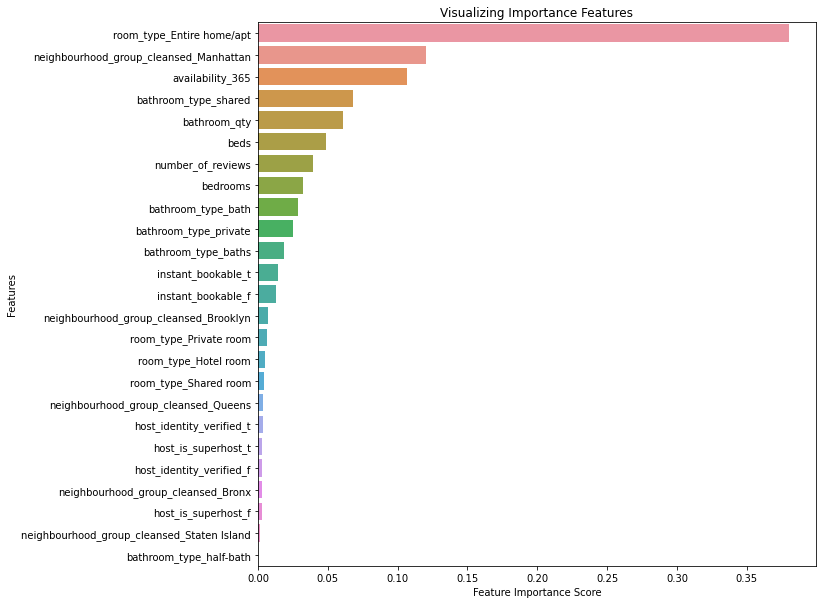

In [ ]:
fig4 = plt.figure(figsize=(10, 10))
feature_imp=pd.Series(GB.feature_importances_,index=train_X.columns).sort_values(ascending=False)
sns.barplot(x = feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Importance Features')

In [ ]:
GB_result = regressionSummary(valid_y, GB.predict(valid_X) )


Regression statistics

                      Mean Error (ME) : 0.0031
       Root Mean Squared Error (RMSE) : 0.4835
            Mean Absolute Error (MAE) : 0.3535
          Mean Percentage Error (MPE) : -0.8735
Mean Absolute Percentage Error (MAPE) : 7.2750


# XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
%%time
xgb_model = XGBRegressor(objective='reg:squarederror', reg_lambda=0)

parameters = {
    'learning_rate': [0.01,0.05,0.1],
    'gamma' : [0.1,0.2],
    'n_estimators' : [0,1000],
    'max_depth' : [5,6],
    'subsample' : [0.5,0.6,0.8,0.9,1.0],
}


xgb_model = RandomizedSearchCV(xgb_model
                               , parameters
                               , n_iter = 100
                               , cv = 10                              
                               , random_state=1
                               , n_jobs=6
                               , scoring ='neg_mean_squared_error')

xgb_model.fit(train_X, train_y)
xgb_model.best_params_

CPU times: user 1min 52s, sys: 8.08 s, total: 2min
Wall time: 3h 23min 51s


In [ ]:
xgb_model.best_score_ 

-0.2341555812243338

In [ ]:
rmes_boost = np.sqrt(-xgb_model.best_score_ )
rmes_boost

0.4838962504755888

In [ ]:
xgb_model = XGBRegressor(subsample=xgb_model.best_params_['subsample'],
                         n_estimators=xgb_model.best_params_['n_estimators'],
                         max_depth =xgb_model.best_params_['max_depth'],
                         learning_rate =xgb_model.best_params_['learning_rate'],
                         gamma = xgb_model.best_params_['gamma'] )
xgb_model.fit(X,y)

[03:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(gamma=0.2, learning_rate=0.01, max_depth=6, n_estimators=1000,
             subsample=0.8)

In [ ]:
a = pd.DataFrame(xgb_model.feature_importances_
                , index = train_X.columns
                , columns=['Importance'])
a = a[a.Importance > 0].sort_values(by = 'Importance')
a

,Importance
bathroom_type_half-bath,0.001250
neighbourhood_group_cleansed_Staten Island,0.003184
neighbourhood_group_cleansed_Bronx,0.003295
number_of_reviews,0.003558
neighbourhood_group_cleansed_Queens,0.003744
host_is_superhost_f,0.003929
host_identity_verified_f,0.004515
room_type_Shared room,0.004736
bathroom_type_baths,0.005424
neighbourhood_group_cleansed_Brooklyn,0.005893


Text(0.5, 1.0, 'Visualizing Importance Features')

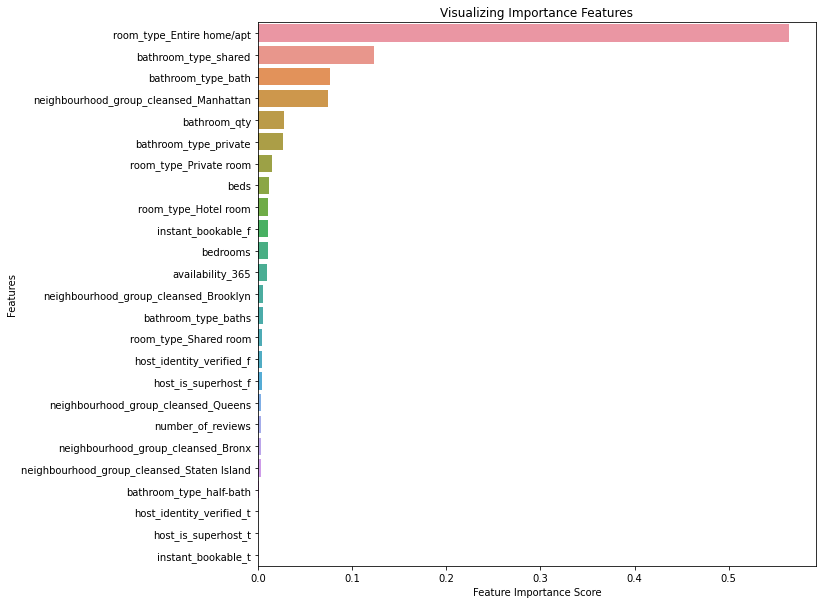

In [ ]:
fig3 = plt.figure(figsize=(10, 10))
feature_imp=pd.Series(xgb_model.feature_importances_,index=train_X.columns).sort_values(ascending=False)
sns.barplot(x = feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Importance Features')

In [ ]:
XGB_result = regressionSummary(valid_y, xgb_model.predict() )


Regression statistics

                      Mean Error (ME) : 0.0019
       Root Mean Squared Error (RMSE) : 0.4580
            Mean Absolute Error (MAE) : 0.3357
          Mean Percentage Error (MPE) : -0.8524
Mean Absolute Percentage Error (MAPE) : 6.9260


# Stacking

In [ ]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
model_lis = [Dec_tree, Rand_forest, GB, xgb_model]

Stack = StackingCVRegressor(model_lis
                           , meta_regressor = LinearRegression()
                           , cv = 10)
Stack.fit(train_X.values, train_y.ravel()) 

[03:35:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:37:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:38:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:39:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:39:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

StackingCVRegressor(cv=10, meta_regressor=LinearRegression(),
                    regressors=[DecisionTreeRegressor(max_depth=10,
                                                      min_samples_leaf=14,
                                                      min_samples_split=3),
                                RandomForestRegressor(max_features=10,
                                                      min_samples_leaf=7,
                                                      min_samples_split=6,
                                                      n_estimators=500),
                                GradientBoostingRegressor(learning_rate=0.03,
                                                          max_depth=5,
                                                          n_estimators=500,
                                                          subsample=0.7),
                                XGBRegressor(gamma=0.2, learning_rate=0.01,
                                             max_de

In [ ]:
pd.DataFrame(Stack.meta_regr_.coef_
            , index = ['Dec_tree', 'Rand_forest', 'GB', 'xgb_model'] 
            , columns = ['Coef_'])

,Coef_
Dec_tree,-0.003554
Rand_forest,0.296511
GB,0.309314
xgb_model,0.409229


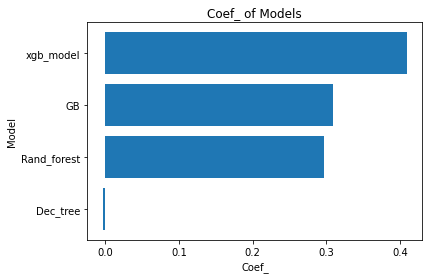

In [ ]:
plt.barh(range(4),Stack.meta_regr_.coef_)
plt.yticks(range(4) , ['Dec_tree', 'Rand_forest', 'GB', 'xgb_model'])
plt.xlabel('Coef_')
plt.ylabel('Model')
plt.title('Coef_ of Models')
plt.show()

# Validation

In [ ]:
from sklearn.model_selection import cross_val_predict as cvp
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [ ]:
model_name_list = ['Dec_tree', 'Rand_forest', 'GB', 'xgb_model']
r2_list = []
for i in model_name_list:
    if i == 'Dec_tree':
        pred = cvp(eval(i),train_X,train_y, cv = 10)
        r2_list.append(r2(np.exp(train_y), np.exp(pred)))
    else:
        pred = cvp(eval(i),train_X,train_y, cv = 10)
        r2_list.append(r2(np.exp(train_y), np.exp(pred)))

[04:11:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:12:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:12:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:13:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:15:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
Model_performance = pd.DataFrame({ 'R2' : r2_list}
                                 , index = model_name_list)
Model_performance

,R2
Dec_tree,0.161362
Rand_forest,0.163738
GB,0.194981
xgb_model,0.190081
